<a href="https://colab.research.google.com/github/manasamadgul/Pytorch_Fundamentals/blob/main/Classifier_BirdOrNot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Train model to identify images of a Bird or not

In [5]:
!pip install -U duckduckgo_search

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 45.2 MB/s eta 0:00:00


In [6]:
from duckduckgo_search import DDGS
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    ddgs = DDGS()

    return L(ddgs.images(term,region= "wt-wt",
    safesearch ="moderate", max_results=max_images)).itemgot('image')

In [7]:
url =search_images('bird photos', max_images=1)
url[0]

Searching for 'bird photos'


'https://images.pexels.com/photos/326900/pexels-photo-326900.jpeg?cs=srgb&dl=wood-flight-bird-326900.jpg&fm=jpg'

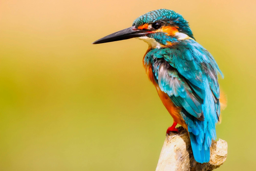

In [8]:
#Download the URL
from fastdownload import download_url
dest = 'bird.jpeg'
download_url(url[0],dest,show_progress = False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)


Searching for 'forest photos'


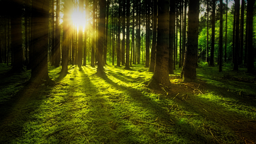

In [9]:
#Search images of forest
from PIL import UnidentifiedImageError # Import the exception class

urlForest = search_images('forest photos', max_images=1)
destforest = 'forest.jpeg'
download_url(urlForest[0],destforest,show_progress=False)
im = Image.open(destforest)
im.to_thumb(256,256)
#try:
 # im = Image.open(destforest)
  #im.to_thumb(256,256)
#except UnidentifiedImageError:
 #   print(f"Cannot identify image file: {destforest}")

Searching for 'human photos'


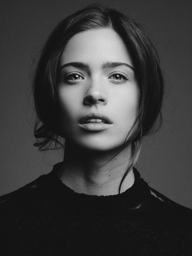

In [10]:
urlhuman = search_images('human photos', max_images=1)
desthuman = 'human.jpeg'
download_url(urlhuman[0],desthuman,show_progress=False)
im = Image.open(desthuman)
im.to_thumb(256,256)

In [11]:
searches = 'forest','bird'
path = Path('bird_or_not')
from time import sleep

for o in searches:
  dest = path/o
  dest.mkdir(exist_ok=True, parents=True)
  download_images(dest,urls=search_images(f'{o} photo'))
  sleep(10)
  download_images(dest,urls=search_images(f'{o} sun photo'))
  sleep(10)
  download_images(dest,urls=search_images(f'{o} shade photo'))
  sleep(10)

  resize_images(path/o,max_size=400,dest=path/o)

Searching for 'forest photo'
Searching for 'forest sun photo'
Searching for 'forest shade photo'
Searching for 'bird photo'
Searching for 'bird sun photo'
Searching for 'bird shade photo'


In [12]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

7

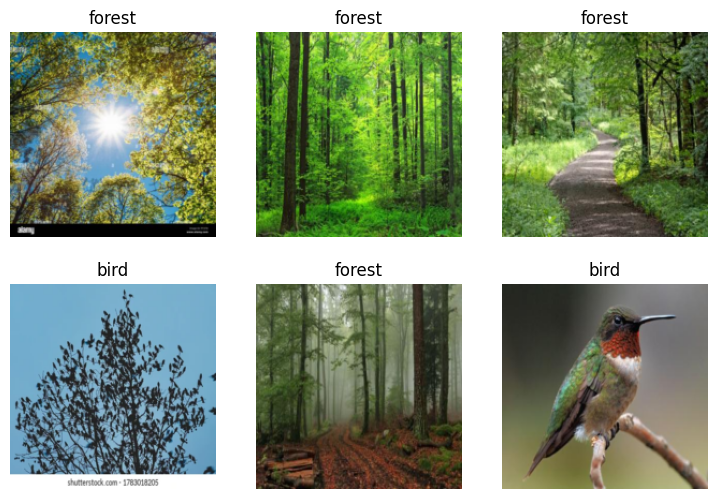

In [13]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)


In [14]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 182MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.919349,0.353785,0.121212,00:02


epoch,train_loss,valid_loss,error_rate,time
0,0.176764,0.083315,0.030303,00:01
1,0.100638,0.030358,0.030303,00:01
2,0.069176,0.019319,0.000000,00:00


In [25]:
is_bird,_,probs = learn.predict(PILImage.create('forest.jpeg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: forest.
Probability it's a bird: 0.0000
